In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [65]:
def plota_grafico (resultado_calculado):
    plt.title("Curva estimada inicial x curva da função x^2") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis")
    x = np.arange(-10, 10, 0.1)
    y = x**2
    
    plt.plot(x,y, 'r', label="Função x^2")
    plt.plot(x, resultado_calculado, 'b', label="Curva estimada ajustada")
    plt.show()

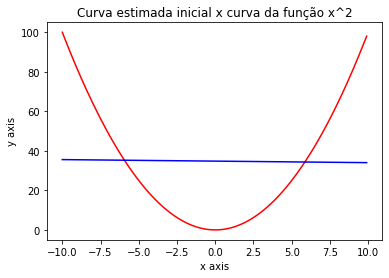

In [66]:
# Modelo Fuzzy TSK - sistema de inferência de Sugeno

max_epocas = 1000
num_ajustes = 1
alpha = 0.01
x=[]
erro_ajuste=[]

# preenche x
x = np.arange(-10, 10, 0.1)
x = x.tolist()

# minimizar o erro da equação:
e = 0

# minimizar o erro de cada um dos parâmetros caminhar na direção contrária do gradiente
p1 = 1
q1 = 1
x1_medio = 1
sigma1 = 1

p2=1
q2=1
x2_medio = 1
sigma2 = 1


for i in range(max_epocas):
    aux_x = []
    aux_x.extend(x)

    for j in range(len(x)):
        # ajuste dos parametros
        for ajuste in range(num_ajustes):
            xi = random.choice(aux_x)
            aux_x.remove(xi)
            w1 = np.exp(-(1/2)*((xi-x1_medio)/sigma1)**2)
            w2 = np.exp(-(1/2)*((xi-x2_medio)/sigma2)**2)

            w1_derivada = w1 / (w1 + w2)
            w2_derivada = w2 / (w1 + w2)

            y1 = p1*xi + q1
            y2 = p2*xi + q2

            y = ((w1*y1) + (w2*y2))/(w1 + w2)

            yd = xi**2

            e = y - yd

            # Derivadas parciais da função erro em relação a cada um dos parâmetros
            dedp1 = e*w1_derivada*xi
            dedp2 = e*w2_derivada*xi
            dedq1 = e*w1_derivada
            dedq2 = e*w2_derivada

            dedx1_medio = e*w2*((y1-y2)/((w1+w2)**2))*w1*((xi-x1_medio)/(sigma1**2))
            dedx2_medio = e*w2*((y2-y1)/((w1+w2)**2))*w1*((xi-x2_medio)/(sigma2**2))

            dedsigma1 = e*w2*((y1-y2)/((w1+w2)**2))*w1*(((xi-x1_medio)**2)/(sigma1**3))
            dedsigma2 = e*w2*((y2-y1)/((w1+w2)**2))*w1*(((xi-x2_medio)**2)/(sigma2**3))

            # Ajustes
            p1 = p1 - alpha*dedp1
            p2 = p2 - alpha*dedp2
            q1 = q1 - alpha*dedq1
            q2 = q2 - alpha*dedq2
            sigma1 = sigma1 - alpha*dedsigma1
            sigma2 = sigma2 - alpha*dedsigma2
            x1_medio = x1_medio - alpha*dedx1_medio
            x2_medio = x2_medio - alpha*dedx2_medio

    erro_ajuste.append(1/2*(e)**2)

# Resultado final
resultado_calculado = []

for xi in x:
    w1 = np.exp(-(1/2)*((xi-x1_medio)/sigma1)**2)
    w2 = np.exp(-(1/2)*((xi-x2_medio)/sigma2)**2)

    y1 = p1*xi + q1
    y2 = p2*xi + q2

    y = ((w1*y1) + (w2*y2))/(w1 + w2)
    resultado_calculado.append(y)
    #print(y)
#print(resultado_calculado)
plota_grafico(resultado_calculado)